In [2]:
import os
from pathlib import Path
from ultralytics import YOLO

# Настройки -- поменяйте при необходимости
MODEL_PATH = 'runs/detect/yolov8n_fast/weights/best.pt'  # Лучшая обученная модель
INPUT_VIDEO = 'videos/test.mp4'
OUTPUT_DIR = 'outputs/videos'
OUTPUT_VIDEO = str(Path(OUTPUT_DIR) / 'annotated_test.mp4')
CONFIDENCE = 0.25
DEVICE = 'cpu'  # или '0' для GPU

# Создать папку вывода
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Загрузить модель
model = YOLO(MODEL_PATH)
print('Model loaded:', MODEL_PATH)

Model loaded: runs/detect/yolov8n_fast/weights/best.pt


## 1. Импорт библиотек

In [3]:
import os
import sys
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Ultralytics YOLO
from ultralytics import YOLO

print("✅ Библиотеки импортированы")

✅ Библиотеки импортированы


## 2. Настройки и пути

In [4]:
# Пути к файлам
MODEL_PATH = 'runs/detect/yolov8n_fast/weights/best.pt'
INPUT_VIDEO = 'videos/test.mp4'
OUTPUT_VIDEO = 'videos/test_annotated.mp4'

# Параметры детекции
CONF_THRESHOLD = 0.25  # Порог уверенности
IOU_THRESHOLD = 0.45   # Порог IoU для NMS

# Проверка существования файлов
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Модель не найдена: {MODEL_PATH}")

if not os.path.exists(INPUT_VIDEO):
    raise FileNotFoundError(f"Видео не найдено: {INPUT_VIDEO}")

# Создание директории для выходного видео
os.makedirs(os.path.dirname(OUTPUT_VIDEO), exist_ok=True)

print(f"📦 Модель: {MODEL_PATH}")
print(f"🎬 Входное видео: {INPUT_VIDEO}")
print(f"💾 Выходное видео: {OUTPUT_VIDEO}")
print(f"🎯 Порог уверенности: {CONF_THRESHOLD}")
print(f"🎯 IoU порог: {IOU_THRESHOLD}")

📦 Модель: runs/detect/yolov8n_fast/weights/best.pt
🎬 Входное видео: videos/test.mp4
💾 Выходное видео: videos/test_annotated.mp4
🎯 Порог уверенности: 0.25
🎯 IoU порог: 0.45


## 3. Загрузка модели

In [5]:
# Загрузка обученной модели
model = YOLO(MODEL_PATH)

# Информация о модели
print("\n📊 Информация о модели:")
print(f"Тип модели: {model.model.__class__.__name__}")
print(f"Названия классов: {model.names}")
print(f"Количество классов: {len(model.names)}")

print("\n✅ Модель загружена успешно")


📊 Информация о модели:
Тип модели: DetectionModel
Названия классов: {0: 'People', 1: 'car', 2: 'chair', 3: 'Table', 4: 'Bottle'}
Количество классов: 5

✅ Модель загружена успешно


## 4. Получение информации о видео

In [6]:
# Открытие видео
cap = cv2.VideoCapture(INPUT_VIDEO)

if not cap.isOpened():
    raise ValueError(f"Не удалось открыть видео: {INPUT_VIDEO}")

# Получение параметров видео
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"\n📹 Параметры видео:")
print(f"FPS: {fps}")
print(f"Разрешение: {width}x{height}")
print(f"Всего кадров: {total_frames}")
print(f"Длительность: {total_frames/fps:.2f} секунд")

cap.release()


📹 Параметры видео:
FPS: 25
Разрешение: 640x360
Всего кадров: 1656
Длительность: 66.24 секунд


## 5. Обработка видео с детекцией объектов

In [7]:
# Открытие видео для чтения
cap = cv2.VideoCapture(INPUT_VIDEO)

# Создание VideoWriter для сохранения результата
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Кодек для MP4
out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (width, height))

if not out.isOpened():
    raise ValueError(f"Не удалось создать выходной файл: {OUTPUT_VIDEO}")

print("\n🎬 Начало обработки видео...\n")

# Счетчики для статистики
frame_count = 0
total_detections = 0

# Обработка каждого кадра
with tqdm(total=total_frames, desc="Обработка кадров") as pbar:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Детекция объектов на кадре
        results = model.predict(
            frame,
            conf=CONF_THRESHOLD,
            iou=IOU_THRESHOLD,
            verbose=False
        )
        
        # Получение аннотированного кадра
        annotated_frame = results[0].plot()
        
        # Подсчет детекций
        num_detections = len(results[0].boxes)
        total_detections += num_detections
        
        # Сохранение кадра
        out.write(annotated_frame)
        
        frame_count += 1
        pbar.update(1)

# Освобождение ресурсов
cap.release()
out.release()

print(f"\n✅ Обработка завершена!")
print(f"📊 Статистика:")
print(f"  - Обработано кадров: {frame_count}")
print(f"  - Всего детекций: {total_detections}")
print(f"  - Среднее количество объектов на кадр: {total_detections/frame_count:.2f}")
print(f"\n💾 Результат сохранен: {OUTPUT_VIDEO}")


🎬 Начало обработки видео...



Обработка кадров: 100%|██████████| 1656/1656 [01:11<00:00, 23.09it/s]


✅ Обработка завершена!
📊 Статистика:
  - Обработано кадров: 1656
  - Всего детекций: 27466
  - Среднее количество объектов на кадр: 16.59

💾 Результат сохранен: videos/test_annotated.mp4


## 6. Проверка размера выходного файла

In [8]:
if os.path.exists(OUTPUT_VIDEO):
    file_size = os.path.getsize(OUTPUT_VIDEO) / (1024 * 1024)  # в МБ
    print(f"\n📁 Размер выходного файла: {file_size:.2f} MB")
    
    # Проверка размера исходного файла
    input_size = os.path.getsize(INPUT_VIDEO) / (1024 * 1024)
    print(f"📁 Размер исходного файла: {input_size:.2f} MB")
    print(f"📊 Соотношение размеров: {file_size/input_size:.2f}x")
else:
    print("⚠️ Выходной файл не найден!")


📁 Размер выходного файла: 80.50 MB
📁 Размер исходного файла: 5.83 MB
📊 Соотношение размеров: 13.82x


## 7. Альтернативный метод: Использование встроенной функции YOLO

YOLO предоставляет упрощенный метод для обработки видео напрямую:

In [9]:
# Альтернативный способ - использование встроенной функции predict с save=True
# Это создаст видео в папке runs/detect/predict

print("\n🎬 Альтернативный метод обработки...\n")

# Обработка видео с автоматическим сохранением
results = model.predict(
    source=INPUT_VIDEO,
    conf=CONF_THRESHOLD,
    iou=IOU_THRESHOLD,
    save=True,  # Сохранить результат
    project='outputs/videos',  # Папка проекта
    name='test_annotated_yolo',  # Имя эксперимента
    exist_ok=True,  # Перезаписать если существует
    verbose=True
)

print("\n✅ Альтернативная обработка завершена!")
print("📁 Результат сохранен в: outputs/videos/test_annotated_yolo/")


🎬 Альтернативный метод обработки...


WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1656) c:\code\susu\CV\hw_3\videos\test.mp4: 224x384 21 Peoples, 31.7ms
video 1/1 (frame 2/1656) c:\code\susu\CV\hw_3\videos\test.mp4: 224x384 21 Peoples, 30.5ms
video 1/1 (frame 3/1656) c:\code\susu\CV\hw_3\videos\test.mp4: 224x384 21 Peoples, 20.7ms
video 1/1 (frame 4/1656) c:\code\susu\CV\hw_3\videos\test.mp4: 224x384 22 Peoples, 23.3ms
video 1/1 (frame 5/1656) c:\code\susu\CV\hw_3\videos\test.mp4: 

## 8. Визуализация случайных кадров из результата

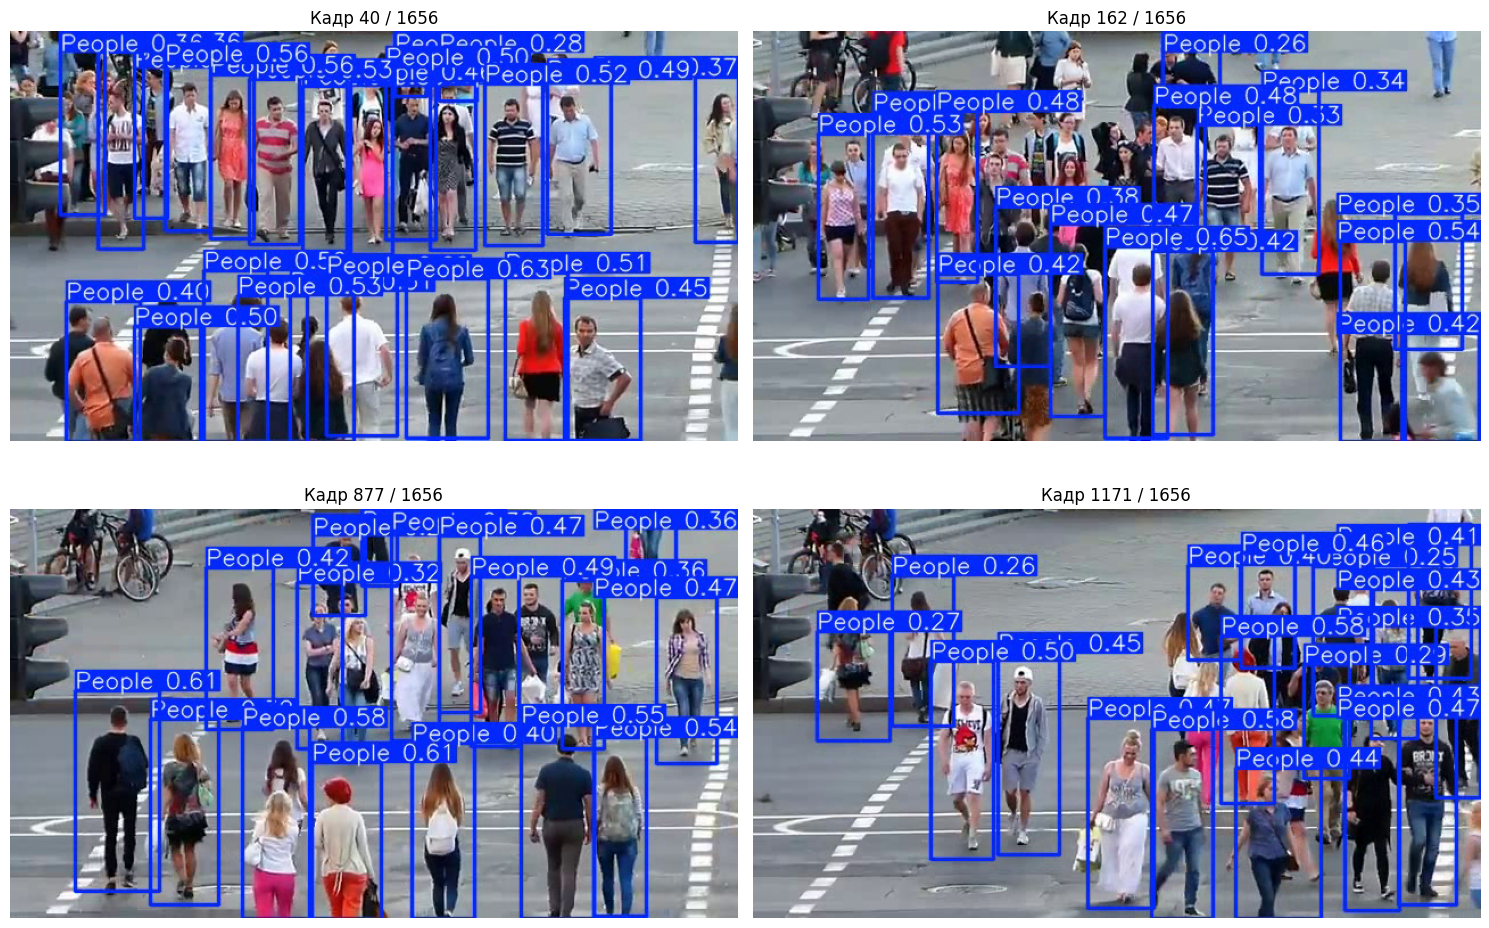


✅ Визуализация сохранена в: outputs/videos/sample_frames.png


In [10]:
import matplotlib.pyplot as plt
import random

# Открытие обработанного видео
cap = cv2.VideoCapture(OUTPUT_VIDEO)

if cap.isOpened():
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Выбор 4 случайных кадров
    random_frames = sorted(random.sample(range(total_frames), min(4, total_frames)))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, frame_num in enumerate(random_frames):
        # Перейти к нужному кадру
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        
        if ret:
            # Конвертация BGR -> RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            axes[idx].imshow(frame_rgb)
            axes[idx].set_title(f'Кадр {frame_num} / {total_frames}')
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('outputs/videos/sample_frames.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    cap.release()
    print("\n✅ Визуализация сохранена в: outputs/videos/sample_frames.png")
else:
    print("⚠️ Не удалось открыть обработанное видео для визуализации")

## 9. Итоги

**Выполненные задачи:**
- ✅ Загружена обученная модель YOLOv8n
- ✅ Обработано видео с детекцией объектов
- ✅ Создано размеченное видео с bounding boxes
- ✅ Сохранены результаты

**Файлы:**
- Модель: `runs/detect/yolov8n_fast/weights/best.pt`
- Входное видео: `videos/test.mp4`
- Выходное видео: `videos/test_annotated.mp4`
- Альтернативный результат: `outputs/videos/test_annotated_yolo/`

In [12]:
# Открываем видео и готовим VideoWriter
cap = cv2.VideoCapture(INPUT_VIDEO)
if not cap.isOpened():
    raise FileNotFoundError(f'Не удалось открыть входное видео: {INPUT_VIDEO}')

fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (w, h))

frame_idx = 0
print(f'Processing {INPUT_VIDEO} -> {OUTPUT_VIDEO} (fps={fps}, size={w}x{h})')

# Итерация по кадрам
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Детекция объектов на кадре
    results = model(frame, conf=CONFIDENCE, device=DEVICE, verbose=False)
    
    # Получение аннотированного кадра с помощью встроенного метода plot()
    annotated_frame = results[0].plot()
    
    # Сохранение кадра
    out.write(annotated_frame)
    
    frame_idx += 1
    if frame_idx % 50 == 0:
        print(f'Обработано {frame_idx} кадров...')

cap.release()
out.release()
print(f'\n✅ Видео сохранено: {OUTPUT_VIDEO}')
print(f'📊 Всего обработано кадров: {frame_idx}')

Processing videos/test.mp4 -> videos/test_annotated.mp4 (fps=25.0, size=640x360)
Обработано 50 кадров...
Обработано 100 кадров...
Обработано 150 кадров...
Обработано 200 кадров...
Обработано 250 кадров...
Обработано 300 кадров...
Обработано 350 кадров...
Обработано 400 кадров...
Обработано 450 кадров...
Обработано 500 кадров...
Обработано 550 кадров...
Обработано 600 кадров...
Обработано 650 кадров...
Обработано 700 кадров...
Обработано 750 кадров...
Обработано 800 кадров...
Обработано 850 кадров...
Обработано 900 кадров...
Обработано 950 кадров...
Обработано 1000 кадров...
Обработано 1050 кадров...
Обработано 1100 кадров...
Обработано 1150 кадров...
Обработано 1200 кадров...
Обработано 1250 кадров...
Обработано 1300 кадров...
Обработано 1350 кадров...
Обработано 1400 кадров...
Обработано 1450 кадров...
Обработано 1500 кадров...
Обработано 1550 кадров...
Обработано 1600 кадров...
Обработано 1650 кадров...

✅ Видео сохранено: videos/test_annotated.mp4
📊 Всего обработано кадров: 1656


## Примечания
- По умолчанию используется `yolov8s.pt` в корне репозитория; замените `MODEL_PATH`, если хотите другую модель.
- Если у вас есть GPU и установлен CUDA-совместимый PyTorch, установите `DEVICE = '0'` для использования первой GPU.
- Пакеты: `ultralytics`, `opencv-python-headless` (или `opencv-python`).